# Naive Bayes Classifier

Naive Bayes is the theory of conditional probablity. It is denoted by the formulae.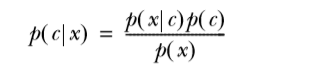
Where p(x|c) denotes probaility of x given c,<br>
p(c) is probability of c,<br>
p(x) is probability of x,<br>
And we are trying to calculate p(c|x) which os nothing but probability of c given x

NB classifier is an attempt to classify a given piece of data into a class based on the probablity of the input belonging to that class. The higher probablity for a certain class, classifies the same into that class

## Document classifier with Naive Bayes

A token is any combination of charachters. Every text string is converted into vector of tokens. If the token is present then, value 1 represents that. Abscence is denoted by value 0

In [2]:
# The below method converts a word list into vector
def loadDataSet():
    postingList=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0,1,0,1,0,1]    #1 is abusive, 0 not
    return postingList,classVec

def createVocabList(dataset):
    vocabset=set([])
    for document in dataset:
        vocabset =vocabset | set(document) # this is union operation. Bitwise OR and set Union has the same operations
    return list(vocabset)

def setOfWordsToVector(vocabList,inputList):
    returnVector = [0]*len(vocabList)
    for word in inputList:
        if word in vocabList:
            returnVector[vocabList.index(word)] =1
        else:
            print ("the word % is not in vocabulary "%word)
    return returnVector


In [3]:
listOfPosts,listOfClasses = loadDataSet()
myVocabList = createVocabList(listOfPosts)
myVocabList

['him',
 'stop',
 'posting',
 'dog',
 'food',
 'not',
 'to',
 'is',
 'buying',
 'ate',
 'worthless',
 'I',
 'dalmation',
 'flea',
 'so',
 'steak',
 'licks',
 'quit',
 'stupid',
 'love',
 'help',
 'please',
 'maybe',
 'take',
 'my',
 'park',
 'cute',
 'garbage',
 'problems',
 'how',
 'mr',
 'has']

In [6]:
setOfWordsToVector(myVocabList,listOfPosts[0])

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1]

In [32]:
from numpy import *
def trainNB0(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory)/float(numTrainDocs)
    #The below steps ensure that all multiplications of probablity which have possible output 0 is elimimnated
    p0Num = ones(numWords); p1Num = ones(numWords)      #change to ones() 
    p0Denom = 2.0; p1Denom = 2.0                        #change to 2.0
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = p1Num/p1Denom          
    p0Vect = p0Num/p0Denom
    
    # below conversion to log is because multiplying many small nnumbers in python will result in data underflow giving ultimately 0
    p1Vect = log(p1Num/p1Denom)          
    p0Vect = log(p0Num/p0Denom)
    
    return p0Vect,p1Vect,pAbusive


In [33]:
trainMat=[]
for postInDoc in listOfPosts:
    trainMat.append(setOfWordsToVector(myVocabList,postInDoc))

p0V,p1V,pAV = trainNB0(trainMat,listOfClasses)


In [34]:
p0V

array([-2.15948425, -2.56494936, -3.25809654, -2.56494936, -3.25809654,
       -3.25809654, -2.56494936, -2.56494936, -3.25809654, -2.56494936,
       -3.25809654, -2.56494936, -2.56494936, -2.56494936, -2.56494936,
       -2.56494936, -2.56494936, -3.25809654, -3.25809654, -2.56494936,
       -2.56494936, -2.56494936, -3.25809654, -3.25809654, -1.87180218,
       -3.25809654, -2.56494936, -3.25809654, -2.56494936, -2.56494936,
       -2.56494936, -2.56494936])

In [35]:
p1V

array([-2.35137526, -2.35137526, -2.35137526, -1.94591015, -2.35137526,
       -2.35137526, -2.35137526, -3.04452244, -2.35137526, -3.04452244,
       -1.94591015, -3.04452244, -3.04452244, -3.04452244, -3.04452244,
       -3.04452244, -3.04452244, -2.35137526, -1.65822808, -3.04452244,
       -3.04452244, -3.04452244, -2.35137526, -2.35137526, -3.04452244,
       -2.35137526, -3.04452244, -2.35137526, -3.04452244, -3.04452244,
       -3.04452244, -3.04452244])

In [36]:
pAV

0.5

In [49]:

def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1 = sum(vec2Classify * p1Vec) + log(pClass1)    #element-wise mult
    p0 = sum(vec2Classify * p0Vec) + log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else: 
        return 0

In [56]:
def testingNB():
    listOPosts,listClasses = loadDataSet()
    myVocabList = createVocabList(listOPosts)
    trainMat=[]
    for postinDoc in listOPosts:
        trainMat.append(setOfWordsToVector(myVocabList, postinDoc))
    p0V,p1V,pAb = trainNB0(array(trainMat),array(listClasses))
    testEntry = ['love', 'my', 'dalmation']
    thisDoc = array(setOfWordsToVector(myVocabList, testEntry))
    print (str(testEntry)+'classified as: '+str(classifyNB(thisDoc,p0V,p1V,pAb)))
    testEntry = ['stupid', 'garbage']
    thisDoc = array(setOfWordsToVector(myVocabList, testEntry))
    print (str(testEntry)+'classified as: '+str(classifyNB(thisDoc,p0V,p1V,pAb)))

In [57]:
testingNB()

['love', 'my', 'dalmation']classified as: 0
['stupid', 'garbage']classified as: 1
